In [18]:
#import pandas, matplotlib
import pandas as pd
import matplotlib.pyplot as plt

#change display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [20]:
#read in and preview file
file_path = 'kickstarter.csv'

data = pd.read_csv(file_path, index_col = 'id')

print(data.head())

            Unnamed: 0  backers_count  \
id                                      
857125548            0              1   
1038659700           1              2   
1238331911           2              0   
189217262            3              0   
1260075071           4              1   

                                                        blurb currency  \
id                                                                       
857125548   Exploring paint and its place in a digital world.      USD   
1038659700  Mike Fassio wants a side-by-side photo of me a...      USD   
1238331911  I need your help to get a nice graphics tablet...      USD   
189217262   I want to create a Nature Photograph Series of...      USD   
1260075071  I want to bring colour to the world in my own ...      GBP   

               goal          launched_at             deadline  \
id                                                              
857125548    2000.0  2015-03-19 22:34:57  2015-04-30 23:12:00  

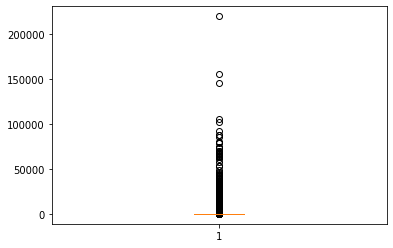

In [23]:
#looking distribution of the backers_count column
plt.boxplot(data['backers_count'])
plt.show()

Looks like successful Kickstart campaigns are outliers in themselves

In [26]:
#show the frequency of location country, will need to count